In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading the files

In [19]:
path = './datasets/train/train_feature.npz'
with np.load(path) as data:
    train_examples = data['features']
    train_labels = data['label']

path = './datasets/valid/valid_feature.npz'
with np.load(path) as data:
    valid_examples = data['features']
    valid_labels = data['label']

In [20]:
print(train_examples.shape, train_labels.shape)
print(valid_examples.shape, valid_labels.shape)

train_examples = np.asarray(train_examples, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int32)
valid_examples = np.asarray(valid_examples, dtype=np.float32)
valid_labels = np.asarray(valid_labels, dtype=np.int32)


(7080, 13, 768) (7080,)
(489, 13, 768) (489,)


# Preprocessing and flattening 

In [21]:
# Flatten the input (since models like RandomForest expect 2D input)
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)
valid_examples_flat = valid_examples.reshape(valid_examples.shape[0], -1)

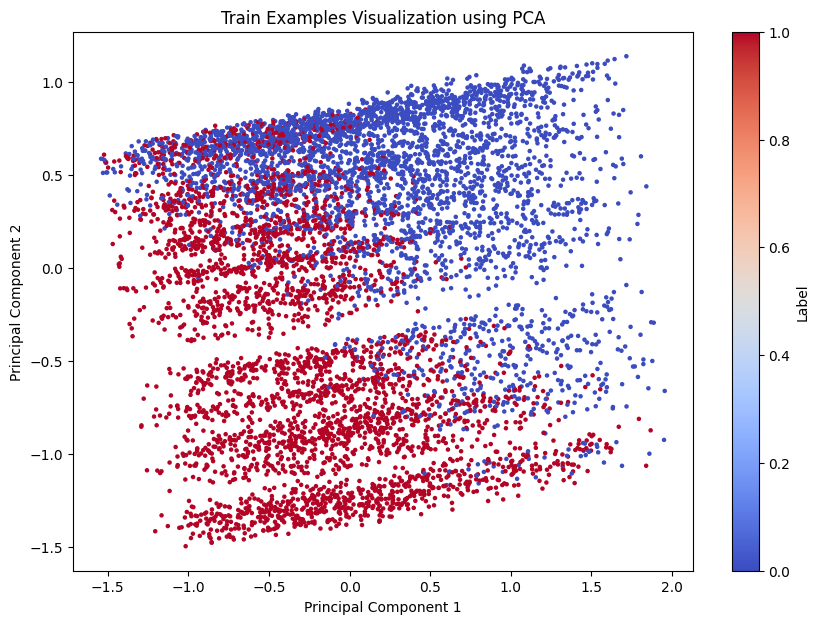

In [22]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Flatten the input if not already flattened
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_examples_flat)

# Plot the PCA result
plt.figure(figsize=(10, 7))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_labels, cmap='coolwarm', s=5)
plt.title('Train Examples Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

## Using basic RF classifier and 100% dataset 

In [23]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy with 100%:", accuracy_score(valid_labels, y_pred))

Accuracy with 100%: 0.9897750511247444


## Using partial dataset now 80% then 70% then 60% then 50%

In [24]:
from sklearn.model_selection import train_test_split

train_examples_80, train_examples_20, train_labels_80, train_labels_20 = train_test_split( train_examples_flat, train_labels, test_size=0.2, random_state=42)
train_examples_70, train_examples_30, train_labels_70, train_labels_30 = train_test_split( train_examples_flat, train_labels, test_size=0.3, random_state=42)
train_examples_60, train_examples_40, train_labels_60, train_labels_40 = train_test_split( train_examples_flat, train_labels, test_size=0.4, random_state=42)
train_examples_50, train_examples_50, train_labels_50, train_labels_50 = train_test_split( train_examples_flat, train_labels, test_size=0.5, random_state=42)

In [25]:

clf_1 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_1.fit(train_examples_80, train_labels_80)
y_pred = clf_1.predict(valid_examples_flat)
print("Accuracy with 80%:", accuracy_score(valid_labels, y_pred))


Accuracy with 80%: 0.9856850715746421


In [26]:
clf_2 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_2.fit(train_examples_60, train_labels_60)
y_pred = clf_2.predict(valid_examples_flat)
print("Accuracy with 60%:", accuracy_score(valid_labels, y_pred))


Accuracy with 60%: 0.9795501022494888


In [27]:
clf_3 = RandomForestClassifier(n_estimators=200,  random_state=0)
clf_3.fit(train_examples_40, train_labels_40)
y_pred = clf_3.predict(valid_examples_flat)
print("Accuracy with 40%:", accuracy_score(valid_labels, y_pred))

Accuracy with 40%: 0.9693251533742331


In [28]:
clf_4 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_4.fit(train_examples_20, train_labels_20)
y_pred = clf_4.predict(valid_examples_flat)
print("Accuracy with 20%:", accuracy_score(valid_labels, y_pred))

Accuracy with 20%: 0.9550102249488752


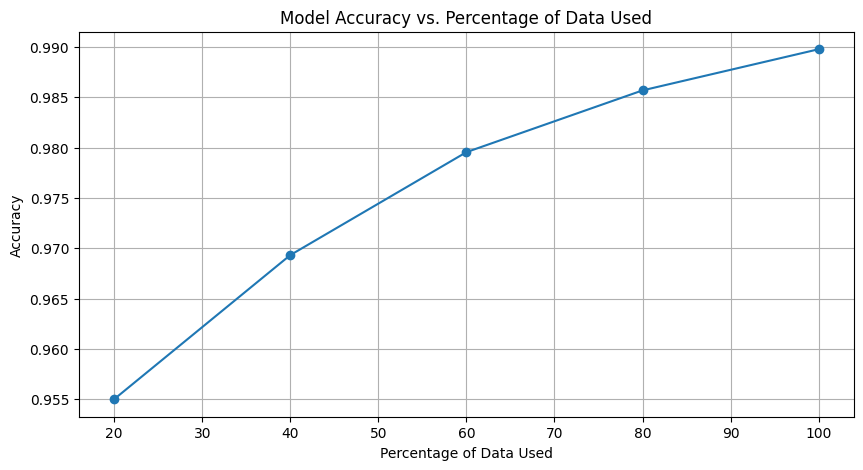

In [29]:
import matplotlib.pyplot as plt

# Percentages of data used
percentages = [100, 80, 60, 40, 20]

# Accuracies corresponding to the percentages 
accuracies = [
    accuracy_score(valid_labels, clf.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_1.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_2.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_3.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_4.predict(valid_examples_flat))
]

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(percentages, accuracies, marker='o')
plt.title('Model Accuracy vs. Percentage of Data Used')
plt.xlabel('Percentage of Data Used')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()